### **Project 2 : Predict heart disease using medical information**

In [0]:
# Import modules

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #plots
import seaborn as sns # plots
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

---
> ##### **1. Checking and understanding the data**
---

* Load data
* Checking missing values
* Checking data structure

---


In [5]:
# Load the data

data = pd.read_csv("https://raw.githubusercontent.com/mp-rocha/data-projects/master/heart-disease-predict/heart-disease-predict/heart.csv")
df = data.copy()
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
# Checking for missing data

print(data.isnull().sum())
print('\nNo missing data')

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

No missing data


---
> ##### **2. Exploratory data analysis**
---

* Describe data
* Number of people with heart disease
* Proportion men x women in dataset
* Who has more heart disease men or women?
* People without heart disease can raise heart rate?
* People with> 120mg blood sugar higher chances of heart disease?
* Are people with high cholesterol prone to heart disease?
* Which type of chest pain is more frequently when the people is sick?

---

In [9]:
# Statistical resume

df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Text(0, 0.5, 'Number of peoples')

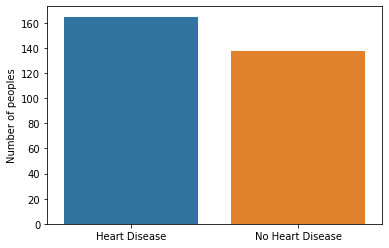

In [21]:
# Number of people with heart disease

n_target = data["target"].value_counts()

fig, ax = plt.subplots()
sns.barplot(x=["Heart Disease", "No Heart Disease"], y=n_target)
plt.ylabel("Number of peoples")


Text(0.5, 1.0, 'Proportion Male x Female')

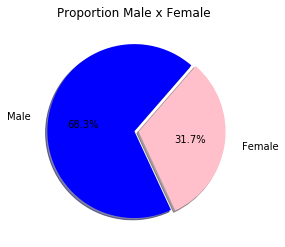

In [12]:
# Proportion of males and females

n_sex = data["sex"].value_counts()
sizes = list(n_sex.values)
fig, ax = plt.subplots()
ax.pie(n_sex, labels= ["Male", "Female"], colors=["blue", "pink"], shadow=True, labeldistance=1.2, autopct='%1.1f%%', explode=(0, 0.05), startangle=49)
plt.title("Proportion Male x Female")

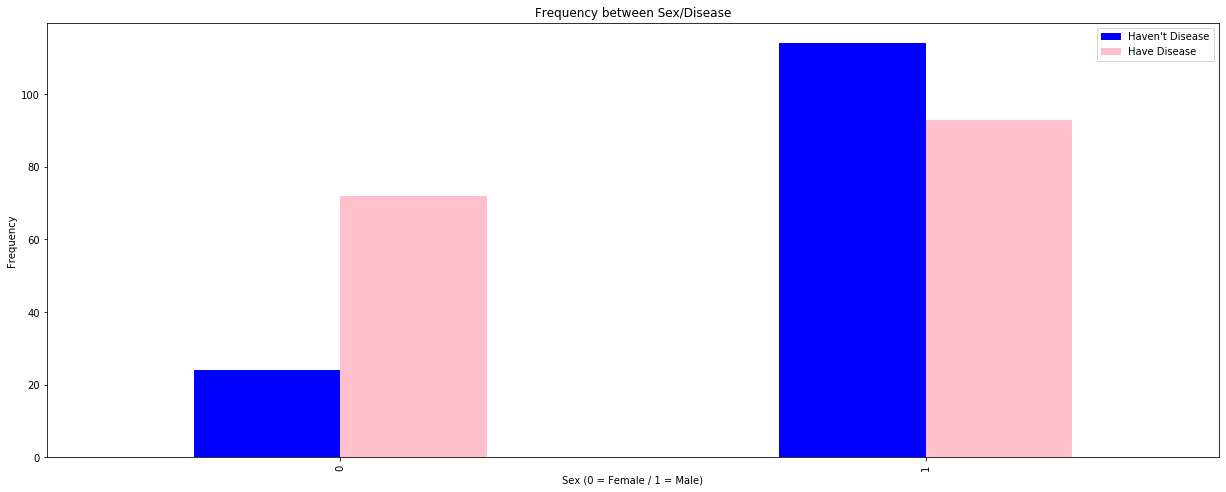

In [13]:
# Who has more heart disease men or women?

pd.crosstab(data.sex, data.target).plot(kind="bar", figsize = (21,8), colors=["blue", "pink"])
plt.title('Frequency between Sex/Disease')
plt.xlabel('Sex (0 = Female / 1 = Male)')
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

In [33]:
# People without heart disease can raise heart rate?

heartraise = data.loc[(data["target"] == 0) & (data["exang"] == 1)]
print("Number of peoples with angina without heart disease: ", len(heartraise.index))

Number of peoples with angina without heart disease:  76


Text(0, 0.5, 'Number of peoples')

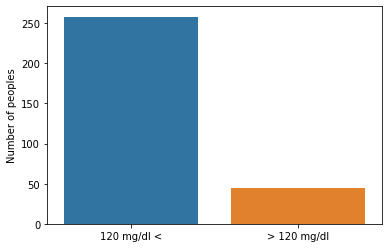

In [49]:
# Number of peoples with sugar blood > 120mg/dl

sns.barplot(x=["120 mg/dl <", "> 120 mg/dl"], y=data["fbs"].value_counts())
plt.ylabel("Number of peoples")

Text(0, 0.5, 'Number of peoples with diabetes')

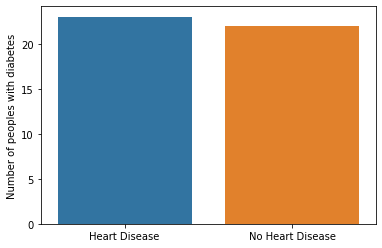

In [52]:
# Are people with diabetes more likely to have heart disease?

diabetes = data.loc[data["fbs"] == 1]
sns.barplot(x=["Heart Disease", "No Heart Disease"], y=diabetes["target"].value_counts())
plt.ylabel("Number of peoples with diabetes")

In [56]:
data[["chol", "target"]]

,chol,target
0,233,1
1,250,1
2,204,1
3,236,1
4,354,1
...,...,...
298,241,0
299,264,0
300,193,0
301,131,0


In [0]:
# Converting Age in class

# 0 - (25-40)
# 1 - (41-50)
# 2 - (51-60)
# 3 - (61-80)

# Defining intervals
age_bins = [0, 40, 50, 60, 120]
age_bins_label = [0, 1, 2, 3]

# Converting numerical variabel "Age" in a categorical variable
df["age"] = pd.cut(df['age'], age_bins, labels=age_bins_label, include_lowest=True)

# Converting "trestbps" in class

# 0 - (90-120)
# 1 - (121-150)
# 2 - (151-200)

# Defining intervals
trestbps_bins = [90, 120, 150, 200]
trestbps_label = [0, 1, 2]

# Converting numerical variable "trestbps" in categorical variable
df['trestbps'] = pd.cut(df['trestbps'], trestbps_bins, labels=trestbps_label, include_lowest=True)

# Converting "chol" in class

# 0 - (0-250)
# 1 - (250-600)

# Defing intervals
chol_bins = [0, 250, 600]
chol_label = [0, 1]

# Converting 'chol' in category variable
df['chol'] = pd.cut(df['chol'], chol_bins, labels=chol_label, include_lowest=True)

# Converting "thalach" in class

# 0 - (80-130)
# 1 - (131-160)
# 2 - (161-210)

# Defing intervals
thalach_bins = [80, 130, 160, 210]
thalach_label = [0, 1, 2]

# Converting 'thalach' in category variable
df['thalach'] = pd.cut(df['thalach'], thalach_bins, labels=thalach_label, include_lowest=True)

# Converting "oldpeak" in class

# 0 - (0-1)
# 1 - (1-2)
# 2 - (2-6)

# Defing intervals
oldpeak_bins = [0, 1, 2, 6]
oldpeak_label = [0, 1, 2]

# Converting 'chol' in category variable
df['oldpeak'] = pd.cut(df['oldpeak'], oldpeak_bins, labels=oldpeak_label, include_lowest=True)

In [0]:
# Using get_dummies to transform in a sparse matrix

df_dummies = pd.get_dummies(df, columns=["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal"])
df_dummies.head(2)

,target,age_0,age_1,age_2,age_3,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,trestbps_0,trestbps_1,trestbps_2,chol_0,chol_1,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,thalach_0,thalach_1,thalach_2,exang_0,exang_1,oldpeak_0,oldpeak_1,oldpeak_2,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0
1,1,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0


 ## 3. Simple exploratory analysis

#### Any question that are necessary to answer

> ##### 1. Who has more heart disease men or women?
> ##### 2. Number of people with heart disease?
> ##### 3. How old is the diagnosis of heart disease most often?
> ##### 4. People without heart disease can raise heart rate?
> ##### 5. People with> 120mg blood sugar higher chances of heart disease?
> ##### 6. Are people with high cholesterol prone to heart disease?
> ##### 7. Which type of chest pain is more frequently when the people is sick?



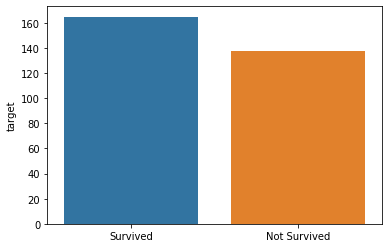

In [0]:
# Checking numbers of "Not Survived" (1) and "Survived" (0)

n_target = data["target"].value_counts()

fig, ax = plt.subplots()
sns.barplot(x=["Survived", "Not Survived"], y=n_target)

Text(0.5, 1.0, 'Proportion Male x Female')

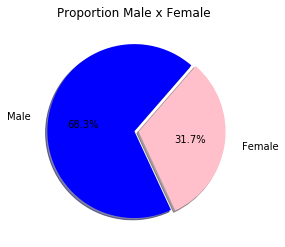

In [0]:
# Proportion of males and females

n_sex = data["sex"].value_counts()
sizes = list(n_sex.values)
fig, ax = plt.subplots()
ax.pie(n_sex, labels= ["Male", "Female"], colors=["blue", "pink"], shadow=True, labeldistance=1.2, autopct='%1.1f%%', explode=(0, 0.05), startangle=49)
plt.title("Proportion Male x Female")

In [0]:
print(pd.crosstab(data.sex, data.target))

target    0   1
sex            
0        24  72
1       114  93


## 4. Data modeling [Create a baseline]

In [0]:
# Defining variables and split data [DATA WITHOUT FEATURE ENGENEERING]

y = data["target"]
X = data.drop(labels=["target"], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Data dimension
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Defining variables and split data [DUMMY DATA]

y_dummies = df_dummies["target"]
X_dummies = df_dummies.drop(labels=["target"], axis = 1)

X_train_dummies, X_test_dummies, y_train_dummies, y_test_dummies = train_test_split(X_dummies, y_dummies, test_size = 0.3, random_state = 42)

# Data dimension
print(X_train_dummies.shape, X_test_dummies.shape, y_train_dummies.shape, y_test_dummies.shape)

(242, 13) (61, 13) (242,) (61,)
(212, 40) (91, 40) (212,) (91,)


In [0]:
# Creating a baseline model 

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

RF_baseline = RandomForestClassifier()
RF_baseline_dummy = RandomForestClassifier()

RF_baseline.fit(X_train, y_train)
RF_baseline_dummy.fit(X_train_dummies, y_train_dummies)

RF_baseline.predict(X_test)
RF_baseline_dummy.predict(X_test_dummies)

print(accuracy_score(y_test, RF_baseline.predict(X_test)))
print(accuracy_score(y_test_dummies, RF_baseline_dummy.predict(X_test_dummies)))

0.8524590163934426
0.8131868131868132


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


## 4.1 Data modeling [Tuning Parameters]


In [0]:
# pip install 'grid search'

!pip install scikit-optimize

     |████████████████████████████████| 81kB 5.8MB/s 


In [0]:
predict_rf_prob = rf.predict_proba(X_test)[:,1]

In [0]:
# Create a function to train a model that will be used like parameters in 'tuning parameter method'

def treinar_modelo(params):
  from sklearn.metrics import accuracy_score
  max_leaf_nodes = params[0]
  n_estimators = params[1]
  max_depth = params[2]

  rf = RandomForestClassifier(max_leaf_nodes = max_leaf_nodes, n_estimators = n_estimators, max_depth=max_depth)
  rf.fit(X_train, y_train)
  predict_rf = rf.predict(X_test)
  
  return accuracy_score(y_test, predict_rf)

def treinar_modelo_dummies(params):
  max_leaf_nodes = params[0]
  n_estimators = params[1]
  max_depth = params[2]

  rf_dummies = RandomForestClassifier(max_leaf_nodes = max_leaf_nodes, n_estimators = n_estimators, max_depth=max_depth)
  rf_dummies.fit(X_train_dummies, y_train_dummies)
  predict_rf_dummies = rf_dummies.predict(X_test_dummies)
  
  return accuracy_score(y_test_dummies, predict_rf_dummies)

In [0]:
# Import the library to tuning parameters
from skopt import dummy_minimize 

# Dummy minimize will be use to find parameters at randomly from a sample
space = [(2, 145), (50, 1000), (50, 1000)]
random_result = dummy_minimize(treinar_modelo, dimensions=space, random_state=42, verbose=0)
random_result_dummies = dummy_minimize(treinar_modelo_dummies, dimensions=space, random_state=42, verbose=0)
# Best parameters
print(random_result.x)
print(random_result_dummies.x)
# Score of the best model
print(random_result.fun)
print(random_result_dummies.fun)

[135, 615, 155]
[42, 77, 184]
0.8360655737704918
0.8241758241758241


In [0]:
# Bayesian optimization

from skopt import gp_minimize
resultados_bayesian = gp_minimize(treinar_modelo, space, n_calls=30, n_random_starts=20, random_state=42, verbose=0)
resultados_bayesian_dummies = gp_minimize(treinar_modelo_dummies, space, n_calls=30, n_random_starts=20, random_state=42, verbose=0)

# Best parameters
print(resultados_bayesian.x)
print(resultados_bayesian_dummies.x)

# Score of the best model
print(resultados_bayesian.fun)
print(resultados_bayesian_dummies.fun)

/usr/local/lib/python3.6/dist-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


[110, 454, 248]
[137, 585, 416]
0.819672131147541
0.8241758241758241


In [0]:
best_rf = RF_baseline

## 5. ML Explainability

In [0]:
# Install library shap for understand the model
!pip install shap

     |████████████████████████████████| 266kB 8.7MB/s 
  Created wheel for shap: filename=shap-0.34.0-cp36-cp36m-linux_x86_64.whl size=383182 sha256=df3d79d1eeb26e8f1b90d1340db39613a29f58c4685c8ef0201d521890c875c8
  Stored in directory: /root/.cache/pip/wheels/28/7e/28/57bc9fcb77579b0df6561298648249370648c0b91dfe42c8ec
Successfully built shap


In [0]:
# Import library
import shap

# Create the objects to understand the model
explainer = shap.TreeExplainer(best_rf)
shap_values = explainer.shap_values(X_train)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


In [0]:
# init js
shap.initjs()

# Force plot
shap.force_plot(explainer.expected_value[1], shap_values[1][0,:], X_train.iloc[0,:])

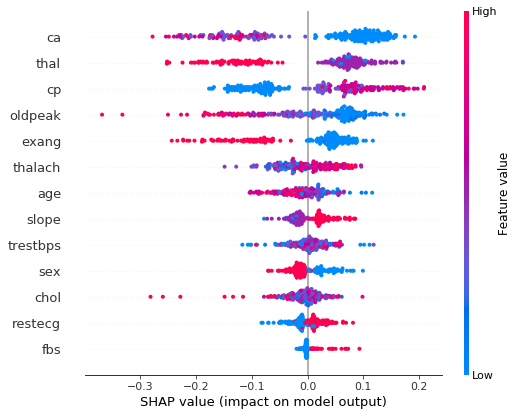

In [0]:
# summary plot - find the most important features

shap.initjs()
shap.summary_plot(shap_values[1], X_train)

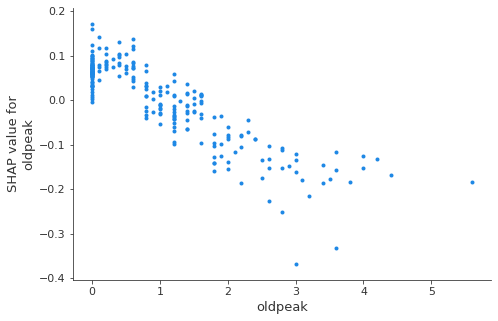

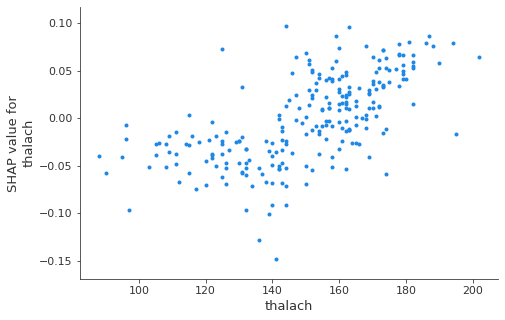

In [0]:
# dependence plot - select one feature to especfic analysis

shap.initjs()
shap.dependence_plot("oldpeak", shap_values[1], X_train, interaction_index=None)
shap.dependence_plot("thalach", shap_values[1], X_train, interaction_index=None)

In [0]:
# Testing others models


(212, 40)

In [0]:
# import Neural Network libraries

import keras
from keras.models import Sequential
from keras.layers import Dense

# Create an archteture layer

# Create a sequential model
model = Sequential()

# Create an input layer
model.add(Dense(16, input_shape=(40,)))

# Create a hidden layer
model.add(Dense(16, activation='relu'))

# Create a hidden layer
model.add(Dense(8, activation='relu'))

# Create a output layer
model.add(Dense(1, activation='sigmoid'))

# Compile my model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Summary of model
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 16)                656       
_________________________________________________________________
dense_14 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_15 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 9         
Total params: 1,073
Trainable params: 1,073
Non-trainable params: 0
_________________________________________________________________


In [0]:
# fit the model

# Train my model for 25 epochs
history = model.fit(X_train_dummies, y_train_dummies, epochs=25, validation_data=(X_test_dummies, y_test_dummies))

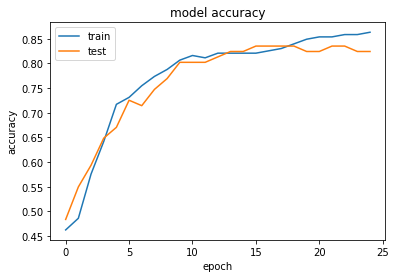

In [0]:
# Plot train vs test accuracy per epoch

plt.figure()

# Using the history metrics
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
# Import the EarlyStopping and ModelCheckpoint callbacks
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Early stop on validation accuracy
monitor_val_acc = EarlyStopping(monitor = 'val_acc', patience = 5)

# Save the best model as best_banknote_model.hdf5
modelCheckpoint = ModelCheckpoint('best_banknote_model.hdf5', save_best_only = True)

# Fit your model for a stupid amount of epochs
history = model.fit(X_train_dummies, y_train_dummies,
                    epochs = 10000000,
                    callbacks = [monitor_val_acc, modelCheckpoint],
                    validation_data = (X_test_dummies, y_test_dummies), learning)

Train on 212 samples, validate on 91 samples
Epoch 1/10000000
212/212 [==============================] - 0s 104us/step - loss: 0.2636 - acc: 0.8726 - val_loss: 0.4199 - val_acc: 0.8132
Epoch 2/10000000
212/212 [==============================] - 0s 78us/step - loss: 0.2582 - acc: 0.8868 - val_loss: 0.4134 - val_acc: 0.8242
Epoch 3/10000000
212/212 [==============================] - 0s 88us/step - loss: 0.2566 - acc: 0.8726 - val_loss: 0.4151 - val_acc: 0.8242
Epoch 4/10000000
212/212 [==============================] - 0s 117us/step - loss: 0.2542 - acc: 0.8726 - val_loss: 0.4199 - val_acc: 0.8242
Epoch 5/10000000
212/212 [==============================] - 0s 96us/step - loss: 0.2519 - acc: 0.8821 - val_loss: 0.4256 - val_acc: 0.8242
Epoch 6/10000000
212/212 [==============================] - 0s 91us/step - loss: 0.2511 - acc: 0.8821 - val_loss: 0.4287 - val_acc: 0.8242
Epoch 7/10000000
212/212 [==============================] - 0s 113us/step - loss: 0.2487 - acc: 0.8821 - val_loss: 0.42

In [0]:
def get_model(X1, y1, X2, y2, input_shape, activation='relu'):

  # Create an archteture layer

  # Create a sequential model
  model = Sequential()

  # Create an input layer
  model.add(Dense(16, input_shape=(input_shape,)))

  # Create a hidden layer
  model.add(Dense(16, activation=activation))

  # Create a hidden layer
  model.add(Dense(8, activation=activation))

  # Create a output layer
  model.add(Dense(1, activation='sigmoid'))

  # Compile my model
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

  # Fitting the model
  return model.fit(X1, y1, epochs=25, validation_data=(X2, y2))